# Author : Sajid Choudhary

- Task 02 : Prediction Using Unsupervised Machine Leaning on Iris Dataset.

# Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Iris.csv")
data = data.drop("Id",axis=1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Check Null values.

data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Data Visualization

Species Feature

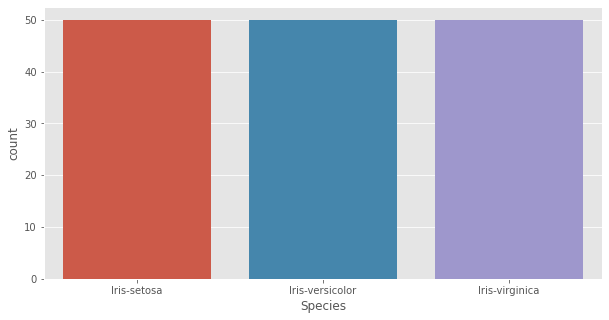

In [6]:
# VALUE _COUNT 

plt.figure(figsize=(10,5))
style.use("ggplot")
sns.countplot(data["Species"])
plt.show()

SepalLengthCm Feature

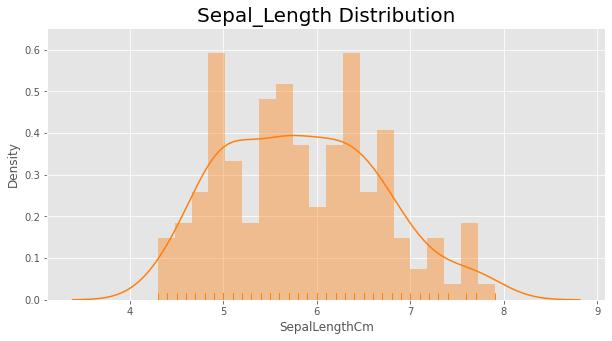

In [12]:
# Check Sepal_Length Distribution by Histogram.

plt.figure(figsize=(10,5))
sns.distplot(data["SepalLengthCm"],bins=20,rug=True,color="tab:orange")
plt.title("Sepal_Length Distribution",fontsize=20)
plt.show()

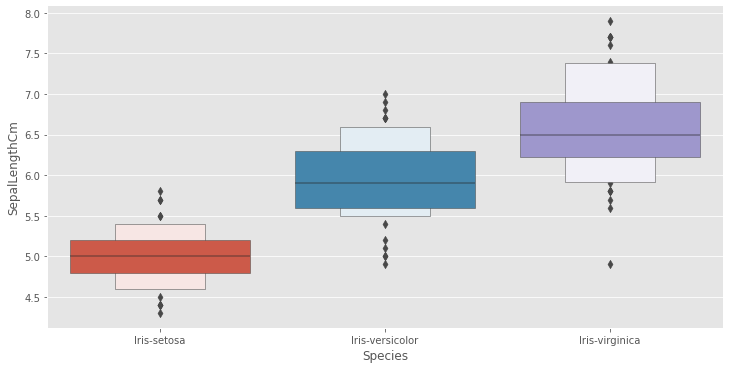

In [31]:
# Sepal_Length Distribution in each Species category.

sns.catplot(y="SepalLengthCm",x="Species",data=data,kind='boxen',height=5,aspect=2)
plt.show()

SepalWidthCm Feature

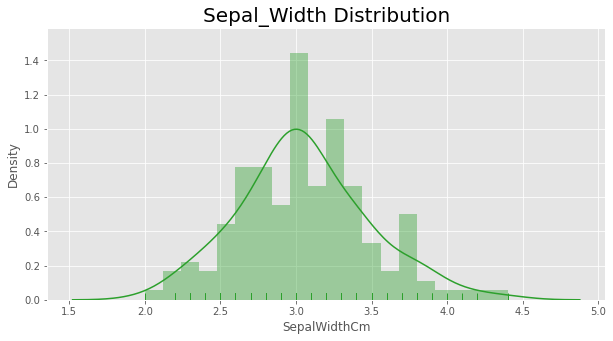

In [13]:
# Check Sepal_Width Distribution by Histogram.

plt.figure(figsize=(10,5))
sns.distplot(data["SepalWidthCm"],bins=20,rug=True,color="tab:green")
plt.title("Sepal_Width Distribution",fontsize=20)
plt.show()

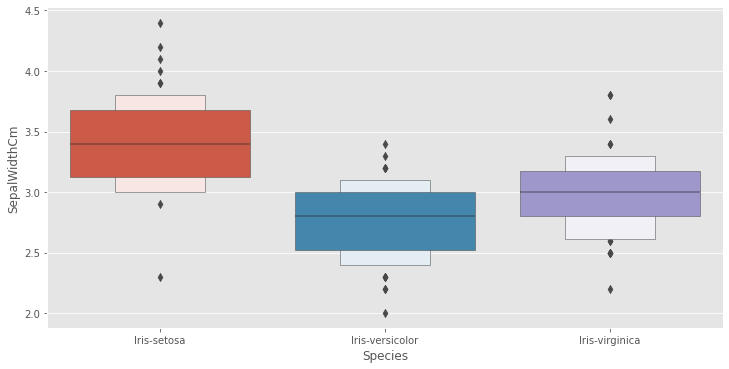

In [32]:
# Sepal_Width Distribution in each Species category.

sns.catplot(y="SepalWidthCm",x="Species",data=data,kind='boxen',height=5,aspect=2)
plt.show()

PetalLengthCm Feature

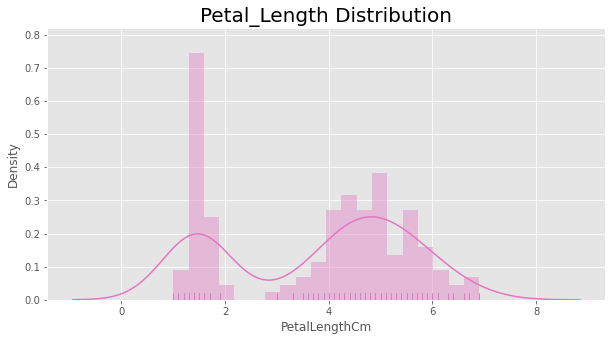

In [15]:
# Check Petal_Length Distribution by Histogram.

plt.figure(figsize=(10,5))
sns.distplot(data["PetalLengthCm"],bins=20,rug=True,color="tab:pink")
plt.title("Petal_Length Distribution",fontsize=20)
plt.show()

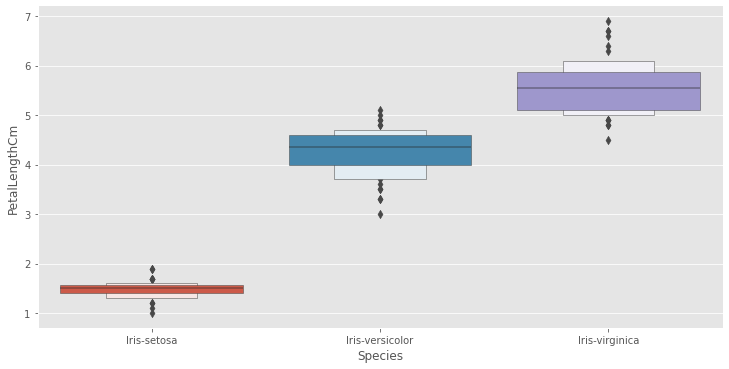

In [33]:
# Petal_Length Distribution in each Species category.

sns.catplot(y="PetalLengthCm",x="Species",data=data,kind='boxen',height=5,aspect=2)
plt.show()

PetalWidthCm Feature

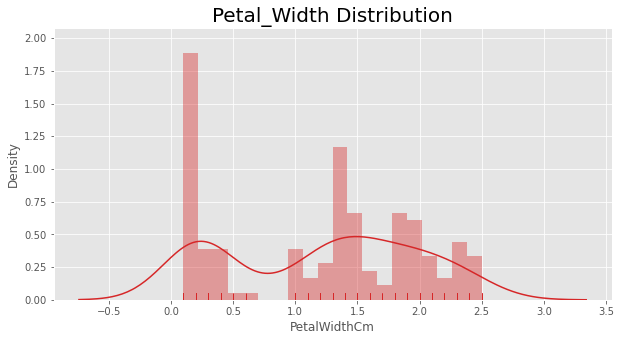

In [17]:
# Check Petal_Width Distribution by Histogram.

plt.figure(figsize=(10,5))
sns.distplot(data["PetalWidthCm"],bins=20,rug=True,color="tab:red")
plt.title("Petal_Width Distribution",fontsize=20)
plt.show()

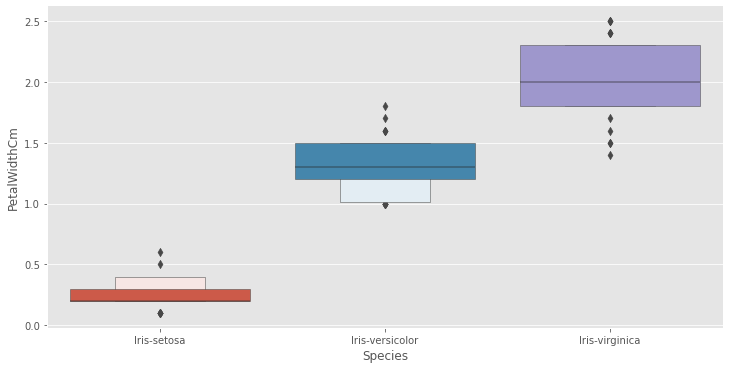

In [34]:
# Petal_Width Distribution in each Species category.

sns.catplot(y="PetalWidthCm",x="Species",data=data,kind='boxen',height=5,aspect=2)
plt.show()

Bivariate Analysis

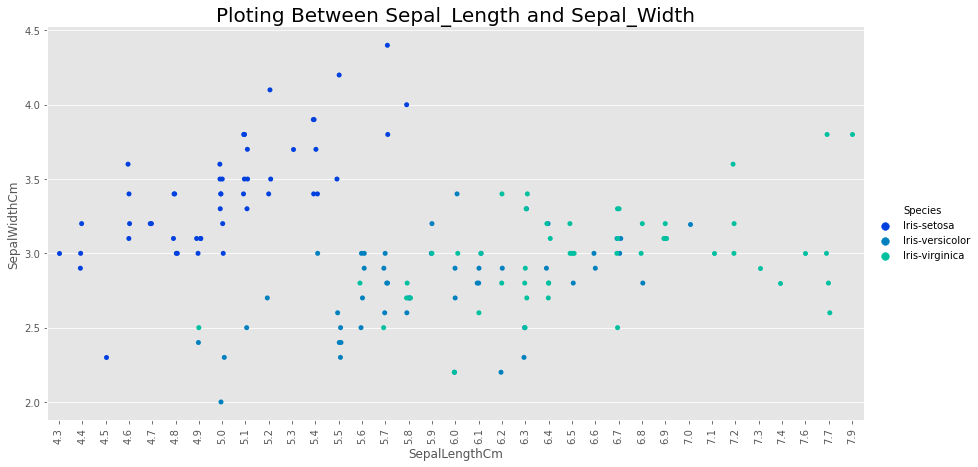

In [44]:
# Ploting Between SepalLength and SepalWidth

sns.catplot(x="SepalLengthCm",y="SepalWidthCm",hue="Species",data=data,kind='strip',height=6,aspect=2,palette="winter")
plt.title("Ploting Between Sepal_Length and Sepal_Width",fontsize=20)
plt.xticks(rotation=90)
plt.show()

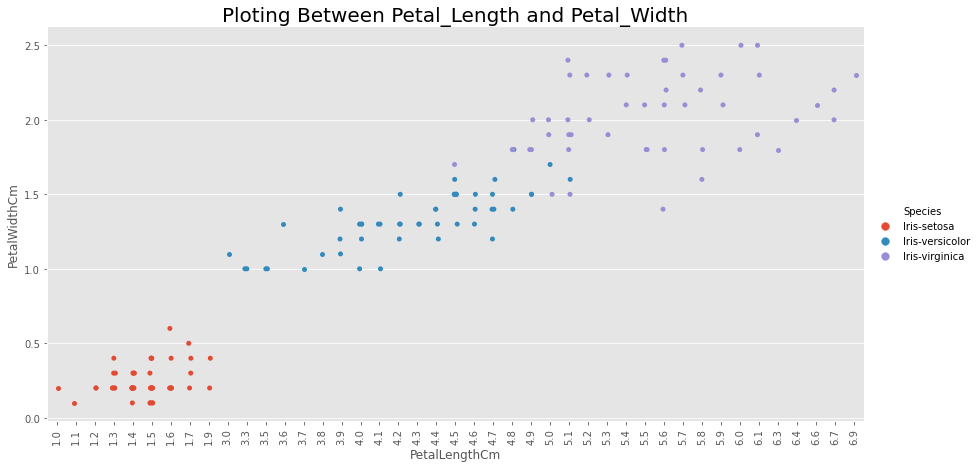

In [43]:
# Ploting Between PetalLength and PetalWidth

sns.catplot(x="PetalLengthCm",y="PetalWidthCm",hue="Species",data=data,kind='strip',height=6,aspect=2,)
plt.title("Ploting Between Petal_Length and Petal_Width",fontsize=20)
plt.xticks(rotation=90)
plt.show()

Multivariate Analysis

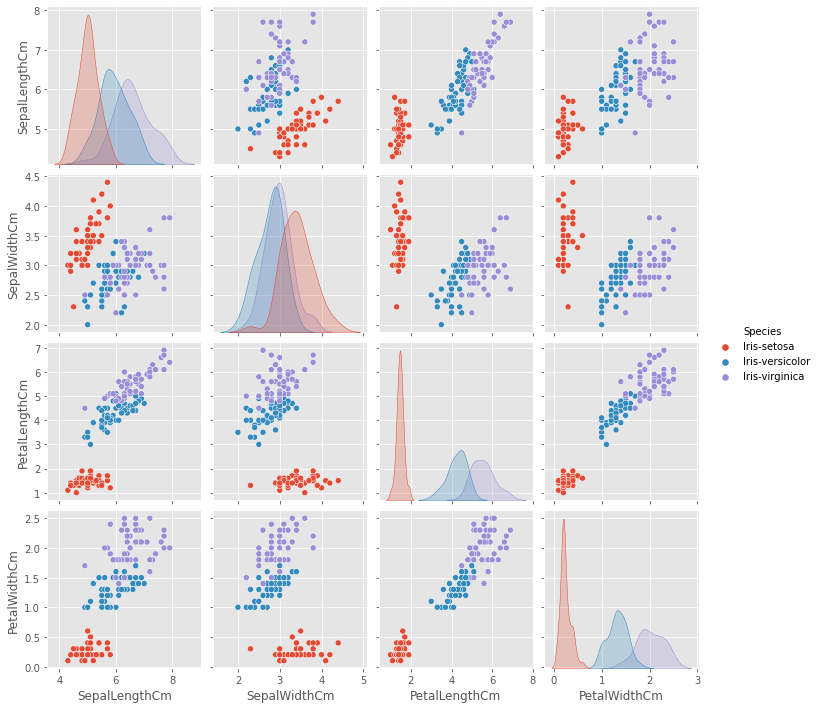

In [46]:
sns.pairplot(data,hue="Species")
plt.show()

Make Clusters by Kmeans Clusters.

In [88]:
# Select feature for clustering.

iris_feature = data.iloc[:,0:4].values
iris_feature

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [48]:
from sklearn.cluster import KMeans

In [68]:
# Select Best value of k by Elbow method.

wcss = []

for i in range(1,21):
    kmean_model = KMeans(n_clusters=i)
    i_cluster = kmean_model.fit_predict(iris_feature)
    wcss.append(kmean_model.inertia_)

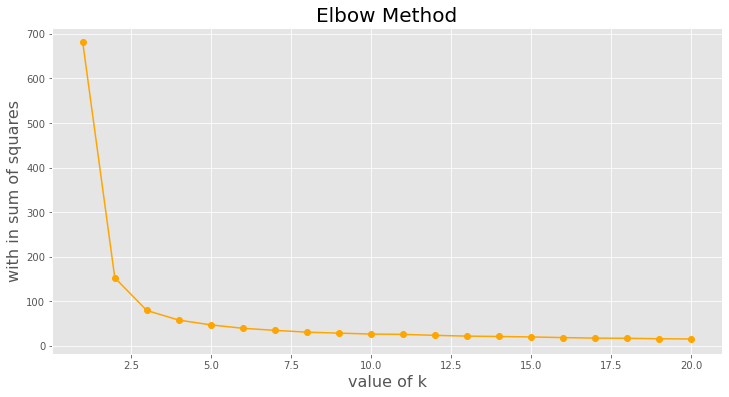

In [71]:
plt.figure(figsize=(12,6))
plt.plot(range(1,21),wcss,marker="o",c="orange")
plt.title("Elbow Method",fontsize=20)
plt.xlabel("value of k",fontsize=16)
plt.ylabel("with in sum of squares",fontsize=16)
plt.show()

The optimum value for K would be 3

In [78]:
k3_cluster = KMeans(n_clusters=3)
cluster = k3_cluster.fit_predict(iris_feature)

In [85]:
cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

# Visualize the Clusters

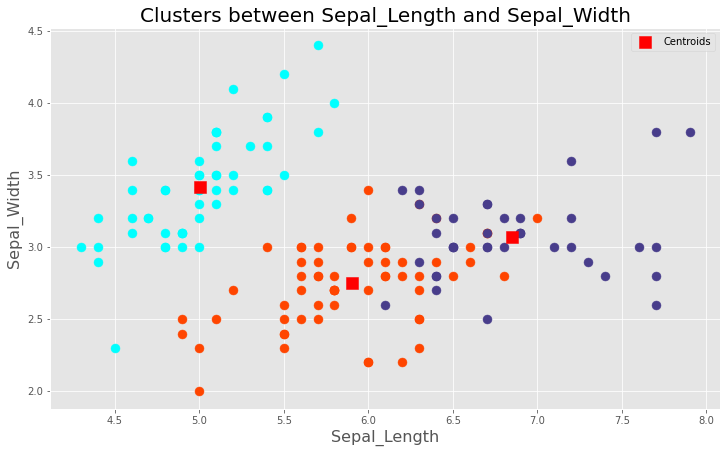

In [90]:
# Visualize Cluster in Sepal_Length and Sepal_Width.

plt.figure(figsize=(12,7))

plt.scatter(iris_feature[cluster == 0, 0], iris_feature[cluster == 0, 1], s =80,c = 'cyan')
plt.scatter(iris_feature[cluster == 1, 0], iris_feature[cluster == 1, 1], s = 80, c = 'orangered')
plt.scatter(iris_feature[cluster == 2, 0], iris_feature [cluster == 2, 1],s = 80, c = 'darkslateblue')
plt.scatter(k3_cluster.cluster_centers_[:, 0], k3_cluster.cluster_centers_[:,1], s = 150,c= 'red',marker='s', 
            label = 'Centroids')
plt.title('Clusters between Sepal_Length and Sepal_Width',fontsize=20)
plt.ylabel('Sepal_Width',fontsize=16)
plt.xlabel('Sepal_Length',fontsize=16)
plt.legend()
plt.show()

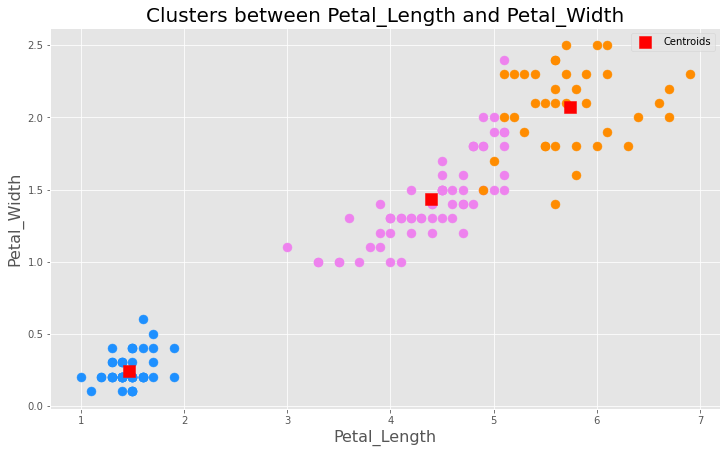

In [92]:
# Visualize Cluster in Petal_Length and Petal_Width.

plt.figure(figsize=(12,7))

plt.scatter(iris_feature[cluster == 0, 2],iris_feature[cluster == 0,3],s=80,c="dodgerblue")
plt.scatter(iris_feature[cluster == 1, 2],iris_feature[cluster == 1,3],s=80,c="violet")
plt.scatter(iris_feature[cluster == 2, 2],iris_feature[cluster == 2,3],s=80,c="darkorange")
plt.scatter(k3_cluster.cluster_centers_[:,2],k3_cluster.cluster_centers_[:,3],s = 150,c= 'red',marker='s',label = 'Centroids')
plt.title('Clusters between Petal_Length and Petal_Width',fontsize=20)
plt.ylabel('Petal_Width',fontsize=16)
plt.xlabel('Petal_Length',fontsize=16)
plt.legend()
plt.show()